# Statistical Tests
**Aprendizaje Automático Avanzado (AAA)**

_Alan García Justel_

A la hora de realizar la comparación estadística entre varios modelos hay que diseñar un experimento teniendo en cuenta la naturaleza de la muestra de datos:
- **Datos pareados:** test de normalidad sobre las diferencias y luego calcular p-value a través de algún método paramétrico (como t-test por ejemplo). Si no se supera el test de normalidad hay que optar por algún método no paramétrico.

- **Datos no pareados:** dos test de normalidad (una para cada modelo) y si no se supera alguno de los dos se opta por los métodos no paramétricos 

La idea detrás de realizar tests de normalidad o _Normality Tests_ es la de comprobar cuánto se aproximan los datos a una distribución normal. En el caso de datos pareados, realizamos el [`normality test`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html) o [`Shapiro-Wilk test`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#scipy.stats.shapiro) sobre las diferencias de los resultados de cada modelo.


## Setup

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.stats import normaltest, shapiro, wilcoxon
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
# For reproducibility
np.random.seed(42)

## Dataset

In [3]:
# Use Iris dataset for this test
X, y = load_iris(return_X_y=True)

## Tests con datos pareados

In [13]:
# Generate Paired Data
def generate_paired_accuracy(n:int):
    accuracy_1  = []
    accuracy_2  = []

    for i in range(n):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
        
        model_1 = GaussianNB()
        y_pred = model_1.fit(X_train, y_train).predict(X_test)
        acc = accuracy_score(y_pred,y_test)
        accuracy_1.append(acc)

        svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
        y_pred = svm.fit(X_train, y_train).predict(X_test)
        acc = accuracy_score(y_pred,y_test)
        accuracy_2.append(acc)

    return np.array(accuracy_1), np.array(accuracy_2)

accuracy_1, accuracy_2 = generate_paired_accuracy(1000)
assert accuracy_1.shape == accuracy_2.shape

# Compute the differences for paired data
difference = accuracy_1 - accuracy_2

### Normality Test

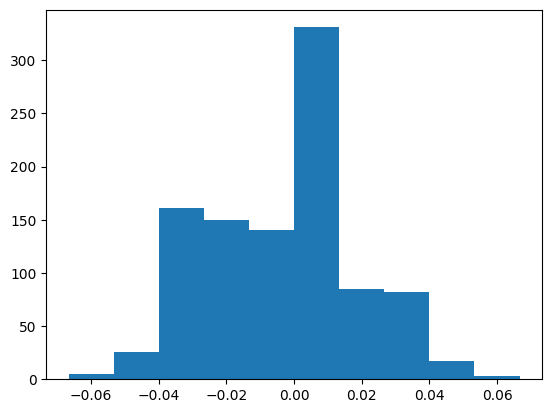

In [12]:
# Se aproxima a una normal??
plt.hist(difference)
plt.show()

In [7]:
# Hacemos el normality test
normality_value = normaltest(difference)
shapiro_value = shapiro(difference)
print(normality_value)
print(shapiro_value)

NormaltestResult(statistic=10.051972977694067, pvalue=0.006565106894697202)
ShapiroResult(statistic=0.9659940817278216, pvalue=1.5787914874276314e-14)


Los normality test para la hipótesis nula _"the data was drawn from a normal distribution"_ dan unos p-values super bajos. Esto implica un riesgo estadístico alto para decir que sí que provienen de una distribución normal. Por ello, recurrimos a tests no paramétricos para muestras pareadas:
 - Non-parametric and paired: _mannwhitneyu_
 - **Non-parametric but paired: _wilcoxon_**


Además, si graficamos las distribuciones del accuracy para los modelos 1 y 2 obtenemos la siguiente representación en la que se distingue cómo ninguno de los dos se aproxima realmente a una distribución normal.

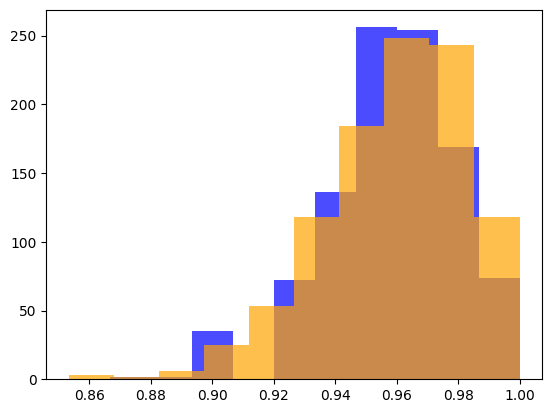

In [8]:
plt.hist(accuracy_1, bins=10, alpha = 0.7, color= "blue")
plt.hist(accuracy_2, bins=10, alpha = 0.7, color= "orange")
plt.show()

### Wilcoxon Test

In [11]:
# null hypothesis that two related paired samples come from the same distribution
wilcoxon_value = wilcoxon(accuracy_1, accuracy_2) 
print(wilcoxon_value)

WilcoxonResult(statistic=107001.5, pvalue=5.869719059556718e-11)


Wilcoxon p-value es muy pequeño por lo que es estadísticamente significativo el decir que las dos distribuciones de los modelos no se parecen (modelos distintos).